In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
!ls

Benefits AU.pdf
Data Scientist.pdf
MYOB data challenge[2].pdf
MYOB_data_challenge_modelling_oversampled_data.ipynb
MYOB_data_challenge_preprocessing.ipynb
cLiML
catboost_info
myob_challenge_dataset.csv
myob_challenge_dataset.csv[2].gz
original_data
oversampled_data
undersampled_data


### Loading and extracting the data

In [3]:
data = pd.read_csv('myob_challenge_dataset.csv')

In [4]:
data.head()

,user_id,event_date,country,subscribed,payload
0,e7a484c4-6a87-44b8-a4d4-87f0cba58f18,2017-07-23 04:46:53.433953,NZ,False,"{""analytics"": {""device"": ""Desktop"", ""email_ope..."
1,5c6d1410-6e36-4cf0-bef1-ffc150e3127b,2017-07-12 12:56:59.982910,NZ,False,"{""analytics"": {""device"": ""Mobile"", ""email_open..."
2,71207879-645a-4e41-bd46-133ba26524bf,2017-07-21 16:51:50.866545,NZ,False,"{""analytics"": {""device"": ""Mobile"", ""email_open..."
3,41219462-d4c1-4c94-ac21-7b7846298de5,2017-07-08 21:53:13.940203,NZ,False,"{""analytics"": {""device"": ""Mobile"", ""email_open..."
4,2eb9a1fe-58e4-4793-8e73-91595d52dacf,2017-08-09 14:23:23.109747,NZ,False,"{""analytics"": {""device"": ""Mobile"", ""email_open..."


### Further extract the data out of the "payload" column, and concat back to the original dataframe.

In [5]:
payload = data.payload.values

In [6]:
data.shape

(50000, 5)

In [7]:
devices = []
email_open_rate_percents = []
referrer_channels = []
campaigns = []
industries = []
time_in_product_mins = []
user_ids = []

for i,item in enumerate(payload):
    user_ids.append(data.user_id.values[i])
    item_dict = json.loads(item)
    analytics = item_dict['analytics']
    
    devices.append(analytics['device'])
    email_open_rate_percents.append(analytics['email_open_rate_percent'])
    referrer_channels.append(analytics['referrer_channel'])
    campaigns.append(analytics['campaign'])
    
    industries.append(item_dict['industry'])
    time_in_product_mins.append(item_dict['time_in_product_mins'])
    
    
    
    

In [8]:
extracted_data = pd.DataFrame({'user_id': user_ids,
                              'devices': devices,
                              'email_open_rate': email_open_rate_percents,
                              'referrer_channels': referrer_channels,
                              'campaigns': campaigns,
                              'industries': industries,
                              'time_in_product_mins': time_in_product_mins})

In [9]:
all_data = data.merge(extracted_data, how = 'left',on = 'user_id')

In [10]:
all_data.drop(columns = ['payload'], inplace = True)

In [11]:
all_data.head()

,user_id,event_date,country,subscribed,devices,email_open_rate,referrer_channels,campaigns,industries,time_in_product_mins
0,e7a484c4-6a87-44b8-a4d4-87f0cba58f18,2017-07-23 04:46:53.433953,NZ,False,Desktop,14.0,Organic,au_nz_eofy,Construction,62.45
1,5c6d1410-6e36-4cf0-bef1-ffc150e3127b,2017-07-12 12:56:59.982910,NZ,False,Mobile,23.0,Direct,au_nz_mobile_product_launch,Education,19.35
2,71207879-645a-4e41-bd46-133ba26524bf,2017-07-21 16:51:50.866545,NZ,False,Mobile,97.0,Paid adversiting,au_nz_mobile_product_launch,Education,76.48
3,41219462-d4c1-4c94-ac21-7b7846298de5,2017-07-08 21:53:13.940203,NZ,False,Mobile,57.0,Paid adversiting,au_nz_mobile_product_launch,Construction,22.53
4,2eb9a1fe-58e4-4793-8e73-91595d52dacf,2017-08-09 14:23:23.109747,NZ,False,Mobile,83.0,Direct,au_nz_mobile_product_launch,Construction,24.50


### Checking data integrity and clean data if necessary

In [12]:
all_data.head()

,user_id,event_date,country,subscribed,devices,email_open_rate,referrer_channels,campaigns,industries,time_in_product_mins
0,e7a484c4-6a87-44b8-a4d4-87f0cba58f18,2017-07-23 04:46:53.433953,NZ,False,Desktop,14.0,Organic,au_nz_eofy,Construction,62.45
1,5c6d1410-6e36-4cf0-bef1-ffc150e3127b,2017-07-12 12:56:59.982910,NZ,False,Mobile,23.0,Direct,au_nz_mobile_product_launch,Education,19.35
2,71207879-645a-4e41-bd46-133ba26524bf,2017-07-21 16:51:50.866545,NZ,False,Mobile,97.0,Paid adversiting,au_nz_mobile_product_launch,Education,76.48
3,41219462-d4c1-4c94-ac21-7b7846298de5,2017-07-08 21:53:13.940203,NZ,False,Mobile,57.0,Paid adversiting,au_nz_mobile_product_launch,Construction,22.53
4,2eb9a1fe-58e4-4793-8e73-91595d52dacf,2017-08-09 14:23:23.109747,NZ,False,Mobile,83.0,Direct,au_nz_mobile_product_launch,Construction,24.50


In [13]:
all_data.shape

(50000, 10)

In [14]:
## check for any missing values
all_data.isnull().sum()

user_id                    0
event_date                 0
country                    0
subscribed                 0
devices                    0
email_open_rate            0
referrer_channels       5028
campaigns                  0
industries                 0
time_in_product_mins       0
dtype: int64

#### Note:
About 10% of the referrer_channel is missing. For now, these missing value are given a string value of 'none'. Will use this as an extra category for referrer channel for now. 

In [15]:
all_data['referrer_channels'].unique()

array(['Organic', 'Direct', 'Paid adversiting', None], dtype=object)

In [16]:
all_data['referrer_channels'].fillna('None', inplace = True)

In [17]:
all_data.isnull().sum()

user_id                 0
event_date              0
country                 0
subscribed              0
devices                 0
email_open_rate         0
referrer_channels       0
campaigns               0
industries              0
time_in_product_mins    0
dtype: int64

### Removing unnecessary columns

In [18]:
all_data.head(1)

,user_id,event_date,country,subscribed,devices,email_open_rate,referrer_channels,campaigns,industries,time_in_product_mins
0,e7a484c4-6a87-44b8-a4d4-87f0cba58f18,2017-07-23 04:46:53.433953,NZ,False,Desktop,14.0,Organic,au_nz_eofy,Construction,62.45


To be removed:
event_date: This is the date and time when the user subscribed. This cannot be used as a predictor.


In [19]:
all_data.drop(columns = ['event_date'], inplace = True)

### EDA

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
all_data['target'] = le.fit_transform(all_data['subscribed'])

In [22]:
all_data['target'][all_data['target'] == 1].shape

(14827,)

In [23]:
all_data['target'][all_data['target'] == 0].shape

(35173,)

Note: class is inbalanced, will resample the smaller class later on

#### EDA of categorical data

In [24]:
from cLiML.eda import edaCategorical

Note: Through out this analysis I will be using a lot of pre-written code from my own library "cLiML". This library is attached in this folder, so you can check out the code if you want.

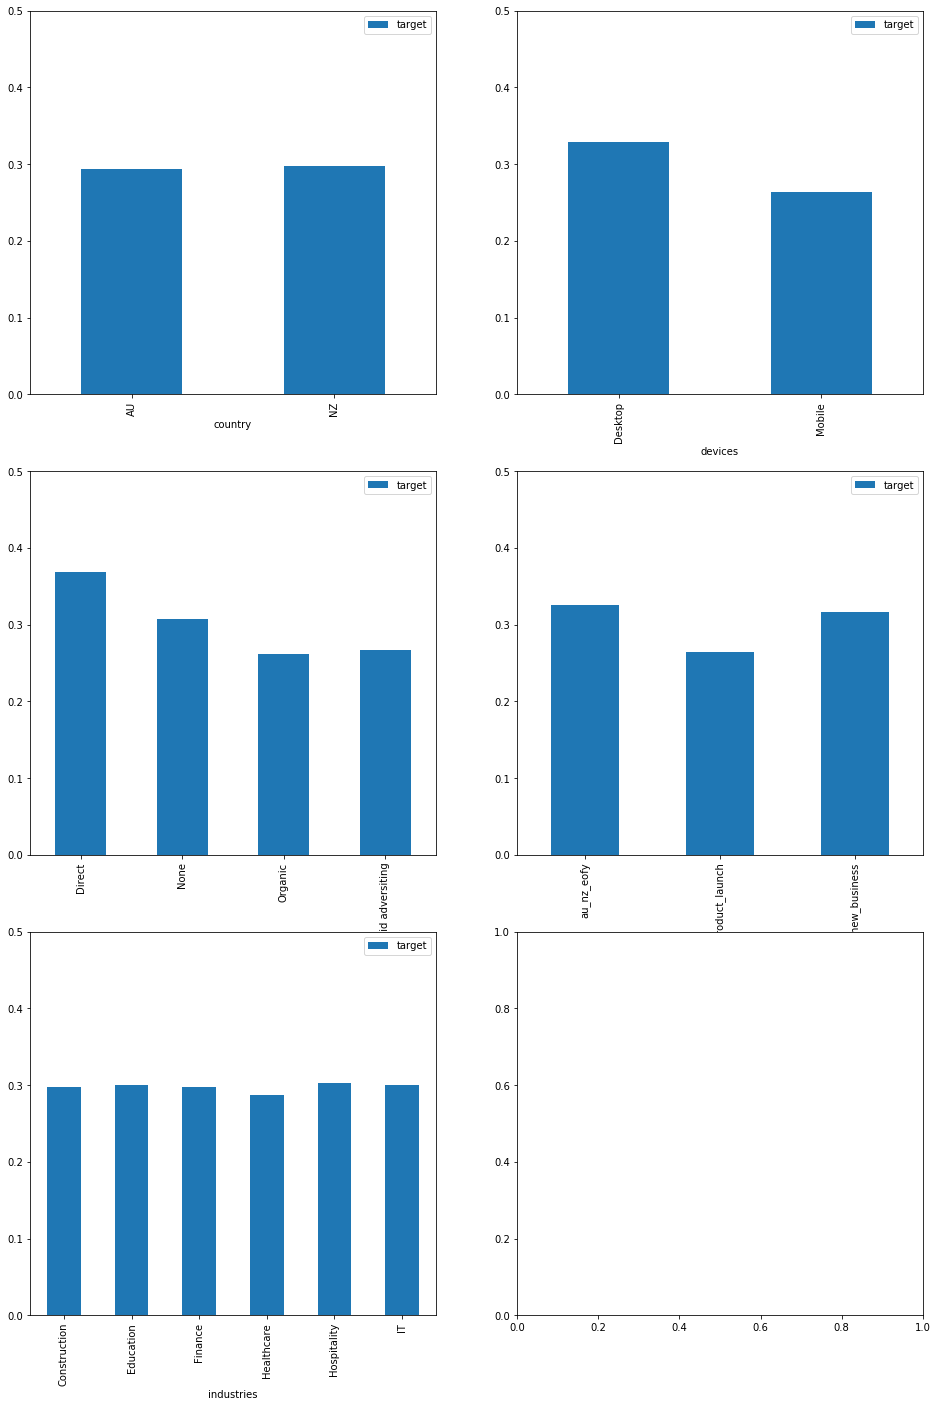

In [100]:
edaCategorical(all_data[['country','devices','referrer_channels','campaigns','industries','target']], target = 'target', aggre='mean', max_y_axis= 0.5)

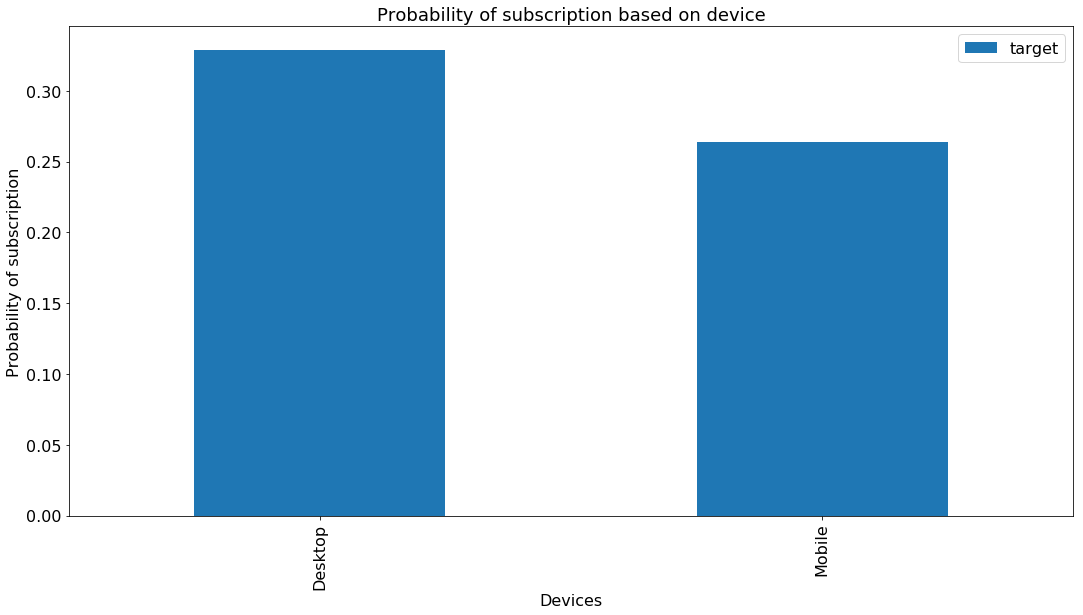

In [110]:
ax = all_data.groupby('devices')[['target']].mean().plot(kind = 'bar',figsize = (18,9))
ax.set_title('Probability of subscription based on device',
            fontsize = 18)
ax.set_ylabel('Probability of subscription', fontsize = 16)
ax.set_xlabel('Devices', fontsize = 16)
ax.tick_params(labelsize=16)
ax.legend(loc=1, prop={'size': 16})

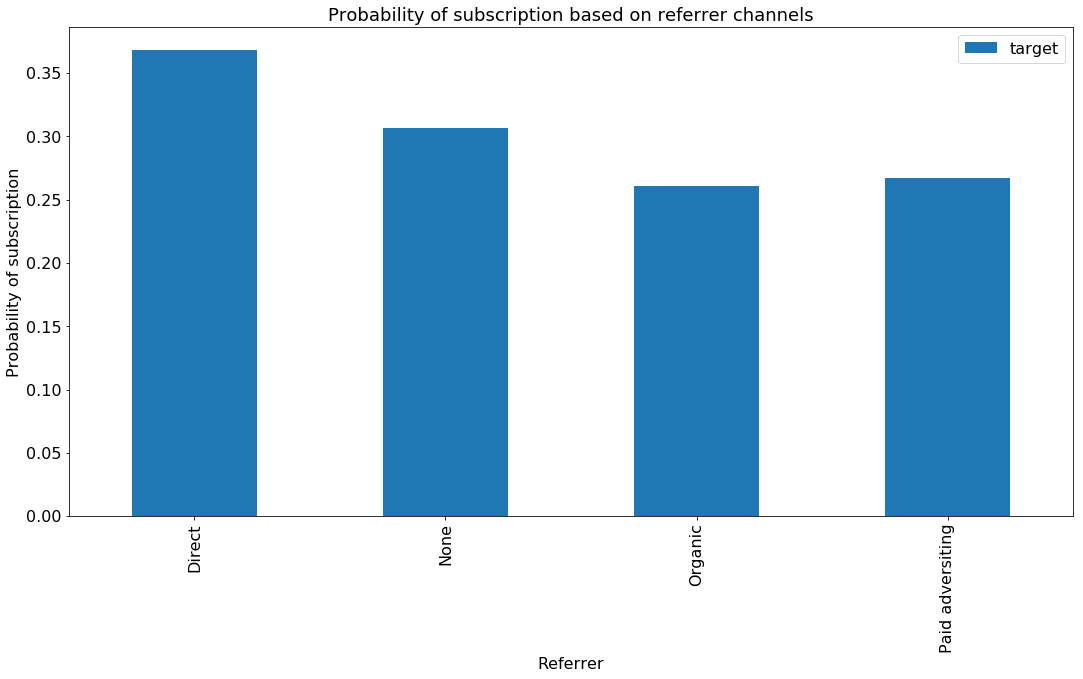

In [112]:
ax = all_data.groupby('referrer_channels')[['target']].mean().plot(kind = 'bar',figsize = (18,9))
ax.set_title('Probability of subscription based on referrer channels',
            fontsize = 18)
ax.set_ylabel('Probability of subscription', fontsize = 16)
ax.set_xlabel('Referrer', fontsize = 16)
ax.tick_params(labelsize=16)
ax.legend(loc=1, prop={'size': 16})

Each of the categorical variable's mean value is ploted against our target variable. From looking at above plots, it is clear that none of the categorical variables are going to be great predictors. Some points to note is that:
- For advertising: Direct method is marginally better than all others.
- For devices: Users using a desktop is more likely to signup.

Both of these observations do make some sense. However we must be skeptical if these observation mean much, it is not yet sure if these difference are statistically significant. For that we will need to conduct a t-test. Which I will perform if time permits.

In [26]:
all_data.head(2)

,user_id,country,subscribed,devices,email_open_rate,referrer_channels,campaigns,industries,time_in_product_mins,target
0,e7a484c4-6a87-44b8-a4d4-87f0cba58f18,NZ,False,Desktop,14.0,Organic,au_nz_eofy,Construction,62.45,0
1,5c6d1410-6e36-4cf0-bef1-ffc150e3127b,NZ,False,Mobile,23.0,Direct,au_nz_mobile_product_launch,Education,19.35,0


#### Test for statistical significance

In [27]:
desktop_data = all_data[all_data['devices'] == 'Desktop']['target']

In [28]:
mobile_data = all_data[all_data['devices'] == 'Mobile']['target']

In [29]:
from scipy.stats import stats

#p-value is divided by 2 as we are doing a one tail test
t_value = stats.ttest_ind(desktop_data, mobile_data, equal_var = False)[0]
p_value = stats.ttest_ind(desktop_data, mobile_data, equal_var = False)[1]/2
print('t-value ', t_value)
print('p-value ', p_value)

t-value  15.987310104987017
p-value  1.088776550943369e-57


Here we conducted a t-test to see if Desktop users are indeed more likely to subscribe than Mobile users. So the Null hypothesis is that Desktop users are NOT more likely to subscribe than Mobile users. We got a t values of 15.8, which means that the difference between the Desktop and Mobile data is 15.8 greater than the difference within them selves. Also the p-value is extremely small, much smaller than 5%, so the probability that the difference we are seeing were caused by chance is very low. Therefore the Null hypothesis is reject.

People using Desktop device are indeed more likely to purchase subscription than a Mobile device user.

In [30]:
all_data.head(2)

,user_id,country,subscribed,devices,email_open_rate,referrer_channels,campaigns,industries,time_in_product_mins,target
0,e7a484c4-6a87-44b8-a4d4-87f0cba58f18,NZ,False,Desktop,14.0,Organic,au_nz_eofy,Construction,62.45,0
1,5c6d1410-6e36-4cf0-bef1-ffc150e3127b,NZ,False,Mobile,23.0,Direct,au_nz_mobile_product_launch,Education,19.35,0


In [31]:
all_data['referrer_channels'].unique()

array(['Organic', 'Direct', 'Paid adversiting', 'None'], dtype=object)

In [32]:
Direct_data = all_data[all_data['referrer_channels'] == 'Direct']['target']
Organic_data = all_data[all_data['referrer_channels'] == 'Organic']['target']
Paid_data = all_data[all_data['referrer_channels'] == 'Paid adversiting']['target']
None_data = all_data[all_data['referrer_channels'] == 'None']['target']

In [33]:
t_value = stats.ttest_ind(Direct_data, Organic_data, equal_var = False)[0]
p_value = stats.ttest_ind(Direct_data, Organic_data, equal_var = False)[1]/2
print('Direct vs Organic t-value ', t_value)
print('Direct vs Organic p-value ', p_value)

t_value = stats.ttest_ind(Direct_data, Paid_data, equal_var = False)[0]
p_value = stats.ttest_ind(Direct_data, Paid_data, equal_var = False)[1]/2
print('Direct vs Paid t-value ', t_value)
print('Direct vs Paid p-value ', p_value)

t_value = stats.ttest_ind(Direct_data, None_data, equal_var = False)[0]
p_value = stats.ttest_ind(Direct_data, None_data, equal_var = False)[1]/2
print('Direct vs None t-value ', t_value)
print('Direct vs None p-value ', p_value)

Direct vs Organic t-value  19.018593508910172
Direct vs Organic p-value  2.0349070730190955e-80
Direct vs Paid t-value  19.036127740916935
Direct vs Paid p-value  1.4108436708773041e-80
Direct vs None t-value  7.923701995649126
Direct vs None p-value  1.2837433800340455e-15


From above series of ttests, it is clear that Direct referral method does indeed result in a higher probability of a user subscribing to the service.

#### EDA of continuous data

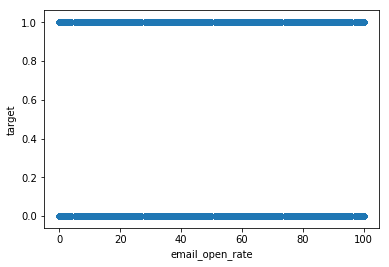

In [34]:
all_data.plot(kind = 'scatter', x = 'email_open_rate', y = 'target')

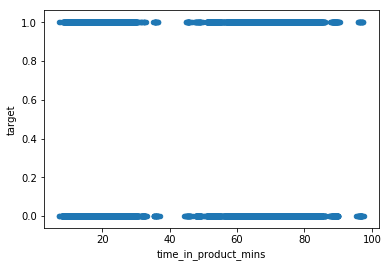

In [35]:
all_data.plot(kind = 'scatter', x = 'time_in_product_mins', y = 'target')

The above plots shows the relationship between our two continuous variables against our target. Again both of which doesn't show too much predictive power when trying to determine whether the user will subscribe or not.

Some note so far:
At this point, it is pretty obvious that machine-learning model isn't going to be very accurate, probably will be around 60% accuracy at most (assuming we later balance the class using over or down sampling).

### Train Test Split

Note: I like to perform Train Test split early, as that keeps the two dataset apart early, this way it prevents information leakage. An example of that is if one is to perform oversampling prior to doing train-test split, it is possible to have duplicated rows of data appearing in both training and test set. This will then cause the model to have an unrealistic level of accuracy.

In [36]:
all_data.shape

(50000, 10)

In [37]:
all_data.dtypes

user_id                  object
country                  object
subscribed                 bool
devices                  object
email_open_rate         float64
referrer_channels        object
campaigns                object
industries               object
time_in_product_mins    float64
target                    int64
dtype: object

In [38]:
X = all_data[['country','devices','email_open_rate','referrer_channels', 'campaigns', 'industries','time_in_product_mins']]

In [39]:
X.shape

(50000, 7)

In [40]:
y = all_data['target']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, stratify = y)

### Dummify 

In [43]:
dummy_variables = ['country','devices','referrer_channels', 'campaigns', 'industries']

In [44]:
from cLiML import model_prep

In [45]:
Xtrain = model_prep.dummify(Xtrain, categorical_var= dummy_variables)

In [46]:
Xtest = model_prep.dummify_test(Xtest, categorical_var= dummy_variables)

In [47]:
Xtest = model_prep.match_test_to_train_columns(Xtest, Xtrain)

### Save data before over and undersampling

In [48]:
# Xtrain.to_csv('./original_data/X_train.csv')
# Xtest.to_csv('./original_data/X_test.csv')
# ytrain.to_csv('./original_data/y_train.csv')
# ytest.to_csv('./original_data/y_test.csv')

### Oversample and undersample

In [49]:
data_train = Xtrain.copy()

In [50]:
data_train['target'] = ytrain

In [51]:
data_test = Xtest.copy()

In [52]:
data_test['target'] = ytest

#### over sampling training data

In [53]:
num_target1_train = data_train[data_train['target'] == 1].shape[0]

In [54]:
num_target0_train = data_train[data_train['target'] == 0].shape[0]

In [55]:
num_target0_train

24621

In [56]:
num_target1_train

10379

In [57]:
oversample_number_train = num_target0_train - num_target1_train

In [58]:
data_train_1 = data_train[data_train['target'] ==1]

In [59]:
sampled_train_1 = data_train_1.sample(oversample_number_train, replace = True).reset_index(drop = True)

In [60]:
data_train_oversampled = pd.concat([data_train, sampled_train_1], axis = 0)

In [61]:
data_train_oversampled = data_train_oversampled.sample(frac = 1).reset_index(drop = True)

In [62]:
data_train_oversampled['target'].mean() # class is now balanced

0.5

#### over sampling test data

In [63]:
num_target1_test = data_test[data_test['target'] == 1].shape[0]

In [64]:
num_target0_test = data_test[data_test['target'] == 0].shape[0]

In [65]:
oversample_number_test = num_target0_test - num_target1_test

In [66]:
data_test_1 = data_test[data_test['target'] == 1]

In [67]:
sampled_test_1 = data_test_1.sample(oversample_number_test, replace = True).reset_index(drop = True)

In [68]:
data_test_oversampled = pd.concat([data_test, sampled_test_1], axis = 0)

In [69]:
data_test_oversampled = data_test_oversampled.sample(frac = 1).reset_index(drop = True)

In [70]:
data_test_oversampled['target'].mean() # class is now balanced

0.5

#### undersampling train data

In [71]:
data_train_1 = data_train[data_train['target'] == 1]

In [72]:
data_train_0 = data_train[data_train['target'] == 0]

In [73]:
print(data_train_0.shape[0] + data_train_1.shape[0] == data_train.shape[0])

True


In [74]:
undersampled_train_0 = data_train_0.sample(data_train_1.shape[0]).reset_index(drop = True)

In [75]:
data_train_undersampled = pd.concat([data_train_1, undersampled_train_0], axis = 0)

In [76]:
data_train_undersampled = data_train_undersampled.sample(frac = 1).reset_index(drop = True)

In [77]:
data_train_undersampled['target'].mean() # class is now balanced

0.5

#### undersampling test data

In [78]:
data_test_1 = data_test[data_test['target'] == 1]

In [79]:
data_test_0 = data_test[data_test['target'] == 0]

In [80]:
print(data_test_0.shape[0] + data_test_1.shape[0] == data_test.shape[0])

True


In [81]:
undersampled_test_0 = data_test_0.sample(data_test_1.shape[0]).reset_index(drop = True)

In [82]:
data_test_undersampled = pd.concat([data_test_1, undersampled_test_0], axis = 0)

In [83]:
# shuffle
data_test_undersampled = data_test_undersampled.sample(frac = 1).reset_index(drop = True)

In [84]:
data_test_undersampled['target'].mean()

0.5

### Prepare oversampled data for modelling

In [85]:
X_train = data_train_oversampled.drop(columns= ['target'])

In [86]:
X_train.shape

(49242, 14)

In [87]:
y_train = data_train_oversampled.target

In [88]:
y_train.shape

(49242,)

In [89]:
X_test = data_test_oversampled.drop(columns = ['target'])

In [90]:
y_test = data_test_oversampled.target

In [91]:
# X_train.to_csv('./oversampled_data/X_train.csv')
# X_test.to_csv('./oversampled_data/X_test.csv')
# y_train.to_csv('./oversampled_data/y_train.csv')
# y_test.to_csv('./oversampled_data/y_test.csv')

### Prepare undersampled data for modelling

In [92]:
X_train = data_train_undersampled.drop(columns = ['target'])

In [93]:
X_train.shape

(20758, 14)

In [94]:
y_train = data_train_undersampled.target

In [95]:
y_train.shape

(20758,)

In [96]:
X_test = data_test_undersampled.drop(columns = ['target'])

In [97]:
y_test = data_test_undersampled.target

In [98]:
# X_train.to_csv('./undersampled_data/X_train.csv')
# X_test.to_csv('./undersampled_data/X_test.csv')
# y_train.to_csv('./undersampled_data/y_train.csv')
# y_test.to_csv('./undersampled_data/y_test.csv')